# Generating Trading Signals

---

### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read in CSV as Pandas DataFrame

In [2]:
# Set path to CSV and read in CSV
csv_path = Path('../Resources/kraken_btc_1hr.csv')
btc_df=pd.read_csv(csv_path)
btc_df

,Timestamp,Open,High,Low,Close,Volume,Symbol
0,2019-08-26 17:00:00+00:00,10324.6,10333.9,10292.7,10300.0,134.471765,BTC/USD
1,2019-08-26 18:00:00+00:00,10300.0,10305.0,10261.0,10290.9,131.790626,BTC/USD
2,2019-08-26 19:00:00+00:00,10290.9,10325.1,10290.0,10310.0,78.294890,BTC/USD
3,2019-08-26 20:00:00+00:00,10311.5,10312.8,10147.5,10262.6,354.930190,BTC/USD
4,2019-08-26 21:00:00+00:00,10265.4,10308.1,10189.7,10274.6,570.039335,BTC/USD
...,...,...,...,...,...,...,...
715,2019-09-25 12:00:00+00:00,8336.7,8363.9,8000.0,8305.7,1295.424881,BTC/USD
716,2019-09-25 13:00:00+00:00,8305.7,8442.5,8278.0,8388.2,459.187772,BTC/USD
717,2019-09-25 14:00:00+00:00,8392.0,8478.4,8375.0,8379.0,466.040826,BTC/USD
718,2019-09-25 15:00:00+00:00,8385.4,8430.0,8294.5,8294.5,259.406669,BTC/USD


### Set Index, Infer DateTimeFormat, and Drop Extraneous Columns

In [3]:
# Set index as datetime object and drop extraneous columns
btc_df.set_index(pd.to_datetime(btc_df['Timestamp'], infer_datetime_format=True), inplace=True)
btc_df.drop(columns=['Timestamp'], inplace=True)
btc_df

,Open,High,Low,Close,Volume,Symbol
Timestamp,,,,,,
2019-08-26 17:00:00+00:00,10324.6,10333.9,10292.7,10300.0,134.471765,BTC/USD
2019-08-26 18:00:00+00:00,10300.0,10305.0,10261.0,10290.9,131.790626,BTC/USD
2019-08-26 19:00:00+00:00,10290.9,10325.1,10290.0,10310.0,78.294890,BTC/USD
2019-08-26 20:00:00+00:00,10311.5,10312.8,10147.5,10262.6,354.930190,BTC/USD
2019-08-26 21:00:00+00:00,10265.4,10308.1,10189.7,10274.6,570.039335,BTC/USD
...,...,...,...,...,...,...
2019-09-25 12:00:00+00:00,8336.7,8363.9,8000.0,8305.7,1295.424881,BTC/USD
2019-09-25 13:00:00+00:00,8305.7,8442.5,8278.0,8388.2,459.187772,BTC/USD
2019-09-25 14:00:00+00:00,8392.0,8478.4,8375.0,8379.0,466.040826,BTC/USD


### Drop NAs and Calculate Daily Returns 

In [4]:
# Drop NAs and calculate daily percent return
btc_df['daily_return'] = btc_df['Close'].dropna().pct_change()
btc_df

,Open,High,Low,Close,Volume,Symbol,daily_return
Timestamp,,,,,,,
2019-08-26 17:00:00+00:00,10324.6,10333.9,10292.7,10300.0,134.471765,BTC/USD,NaN
2019-08-26 18:00:00+00:00,10300.0,10305.0,10261.0,10290.9,131.790626,BTC/USD,-0.000883
2019-08-26 19:00:00+00:00,10290.9,10325.1,10290.0,10310.0,78.294890,BTC/USD,0.001856
2019-08-26 20:00:00+00:00,10311.5,10312.8,10147.5,10262.6,354.930190,BTC/USD,-0.004597
2019-08-26 21:00:00+00:00,10265.4,10308.1,10189.7,10274.6,570.039335,BTC/USD,0.001169
...,...,...,...,...,...,...,...
2019-09-25 12:00:00+00:00,8336.7,8363.9,8000.0,8305.7,1295.424881,BTC/USD,-0.003957
2019-09-25 13:00:00+00:00,8305.7,8442.5,8278.0,8388.2,459.187772,BTC/USD,0.009933
2019-09-25 14:00:00+00:00,8392.0,8478.4,8375.0,8379.0,466.040826,BTC/USD,-0.001097


### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)

In [5]:
# Set short and long windows


# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively


# Construct a crossover trading signal


btc_df.head()

,Open,High,Low,Close,Volume,Symbol,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,crossover_value
Timestamp,,,,,,,,,,,,,
2019-08-26 17:00:00+00:00,10324.6,10333.9,10292.7,10300.0,134.471765,BTC/USD,NaN,10300.000000,10300.000000,0.0,0.0,0.0,0.000000
2019-08-26 18:00:00+00:00,10300.0,10305.0,10261.0,10290.9,131.790626,BTC/USD,-0.000883,10293.933333,10295.292372,0.0,-1.0,-1.0,-0.000132
2019-08-26 19:00:00+00:00,10290.9,10325.1,10290.0,10310.0,78.294890,BTC/USD,0.001856,10303.114286,10300.538382,1.0,0.0,1.0,0.000250
2019-08-26 20:00:00+00:00,10311.5,10312.8,10147.5,10262.6,354.930190,BTC/USD,-0.004597,10281.506667,10290.046097,0.0,-1.0,-1.0,-0.000830
2019-08-26 21:00:00+00:00,10265.4,10308.1,10189.7,10274.6,570.039335,BTC/USD,0.001169,10277.941935,10286.514507,0.0,-1.0,-1.0,-0.000833


### Plot Exponential Moving Average of Closing Prices

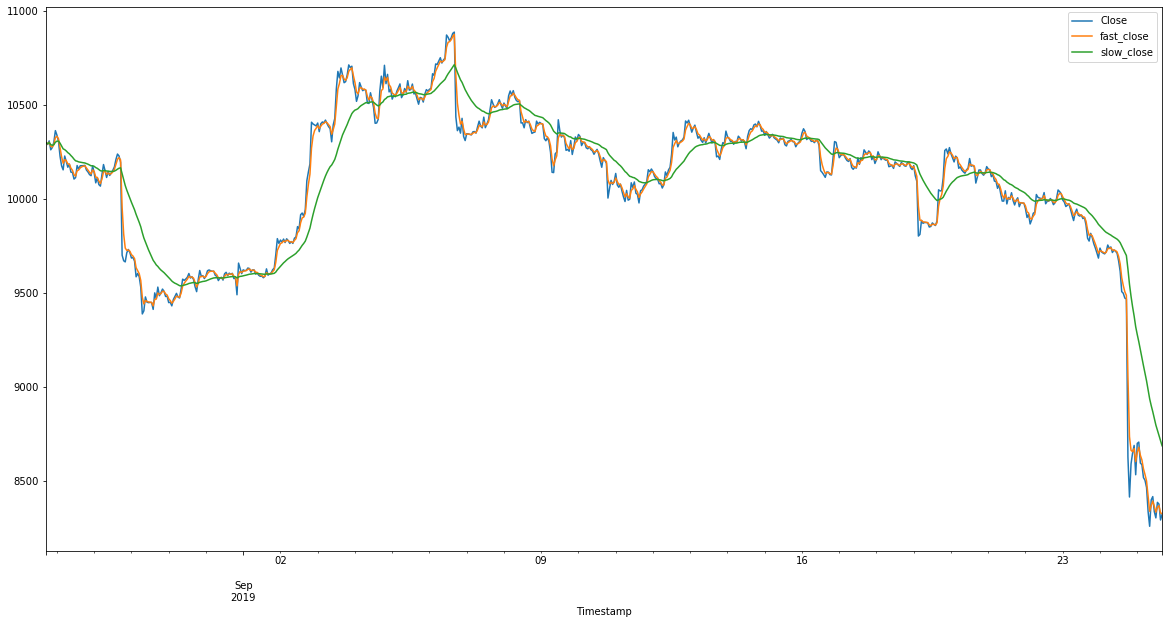

In [6]:
# Plot the EMA of BTC/USD closing prices


### Construct Exponential Moving Average of Daily Return Volatility (Trading Signal, Feature Two)

In [7]:
# Set short and long volatility windows


# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively


# Construct a crossover trading signal


btc_df

,Open,High,Low,Close,Volume,Symbol,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,crossover_value,fast_vol,slow_vol,vol_trend_long,vol_trend_short,vol_trend_signal
Timestamp,,,,,,,,,,,,,,,,,,
2019-08-26 17:00:00+00:00,10324.6,10333.9,10292.7,10300.0,134.471765,BTC/USD,NaN,10300.000000,10300.000000,0.0,0.0,0.0,0.000000,NaN,NaN,0.0,0.0,0.0
2019-08-26 18:00:00+00:00,10300.0,10305.0,10261.0,10290.9,131.790626,BTC/USD,-0.000883,10293.933333,10295.292372,0.0,-1.0,-1.0,-0.000132,NaN,NaN,0.0,0.0,0.0
2019-08-26 19:00:00+00:00,10290.9,10325.1,10290.0,10310.0,78.294890,BTC/USD,0.001856,10303.114286,10300.538382,1.0,0.0,1.0,0.000250,0.001937,0.001937,0.0,0.0,0.0
2019-08-26 20:00:00+00:00,10311.5,10312.8,10147.5,10262.6,354.930190,BTC/USD,-0.004597,10281.506667,10290.046097,0.0,-1.0,-1.0,-0.000830,0.003796,0.003300,0.0,-1.0,-1.0
2019-08-26 21:00:00+00:00,10265.4,10308.1,10189.7,10274.6,570.039335,BTC/USD,0.001169,10277.941935,10286.514507,0.0,-1.0,-1.0,-0.000833,0.003283,0.002938,0.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-25 12:00:00+00:00,8336.7,8363.9,8000.0,8305.7,1295.424881,BTC/USD,-0.003957,8336.263582,8799.354978,0.0,-1.0,-1.0,-0.052628,0.008004,0.015465,1.0,0.0,1.0
2019-09-25 13:00:00+00:00,8305.7,8442.5,8278.0,8388.2,459.187772,BTC/USD,0.009933,8362.231791,8771.821159,0.0,-1.0,-1.0,-0.046694,0.010050,0.015345,1.0,0.0,1.0
2019-09-25 14:00:00+00:00,8392.0,8478.4,8375.0,8379.0,466.040826,BTC/USD,-0.001097,8370.615896,8745.515101,0.0,-1.0,-1.0,-0.042868,0.007568,0.014830,1.0,0.0,1.0


### Plot Exponential Moving Average of Daily Return Volatility

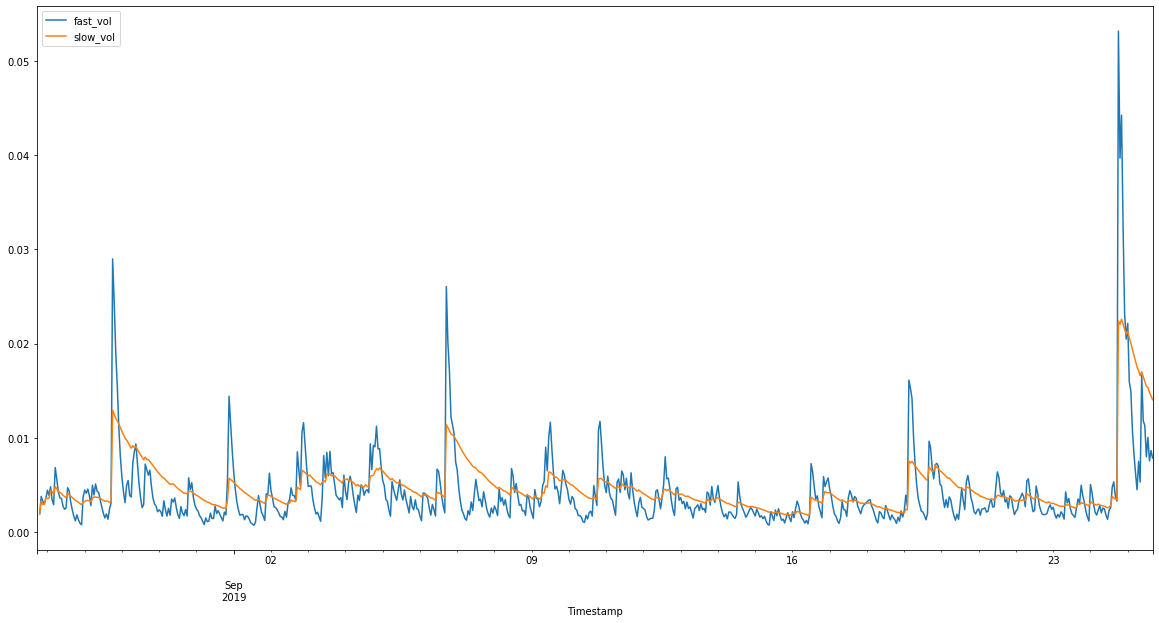

In [8]:
# Plot the EMA of BTC/USD daily return volatility


### Construct Bollinger Band (Trading Signal, Feature Three)

In [9]:
# Set bollinger band window


# Calculate rolling mean and standard deviation


# Calculate upper and lowers bands of bollinger band


# Calculate bollinger band trading signal


btc_df

,Open,High,Low,Close,Volume,Symbol,daily_return,fast_close,slow_close,crossover_long,...,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-08-26 17:00:00+00:00,10324.6,10333.9,10292.7,10300.0,134.471765,BTC/USD,NaN,10300.000000,10300.000000,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-08-26 18:00:00+00:00,10300.0,10305.0,10261.0,10290.9,131.790626,BTC/USD,-0.000883,10293.933333,10295.292372,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-08-26 19:00:00+00:00,10290.9,10325.1,10290.0,10310.0,78.294890,BTC/USD,0.001856,10303.114286,10300.538382,1.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-08-26 20:00:00+00:00,10311.5,10312.8,10147.5,10262.6,354.930190,BTC/USD,-0.004597,10281.506667,10290.046097,0.0,...,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2019-08-26 21:00:00+00:00,10265.4,10308.1,10189.7,10274.6,570.039335,BTC/USD,0.001169,10277.941935,10286.514507,0.0,...,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-25 12:00:00+00:00,8336.7,8363.9,8000.0,8305.7,1295.424881,BTC/USD,-0.003957,8336.263582,8799.354978,0.0,...,1.0,0.0,1.0,8556.905,254.811023,8811.716023,8302.093977,0.0,0.0,0.0
2019-09-25 13:00:00+00:00,8305.7,8442.5,8278.0,8388.2,459.187772,BTC/USD,0.009933,8362.231791,8771.821159,0.0,...,1.0,0.0,1.0,8502.845,139.738302,8642.583302,8363.106698,0.0,0.0,0.0
2019-09-25 14:00:00+00:00,8392.0,8478.4,8375.0,8379.0,466.040826,BTC/USD,-0.001097,8370.615896,8745.515101,0.0,...,1.0,0.0,1.0,8490.345,139.039292,8629.384292,8351.305708,0.0,0.0,0.0


### Plot Bollinger Bands

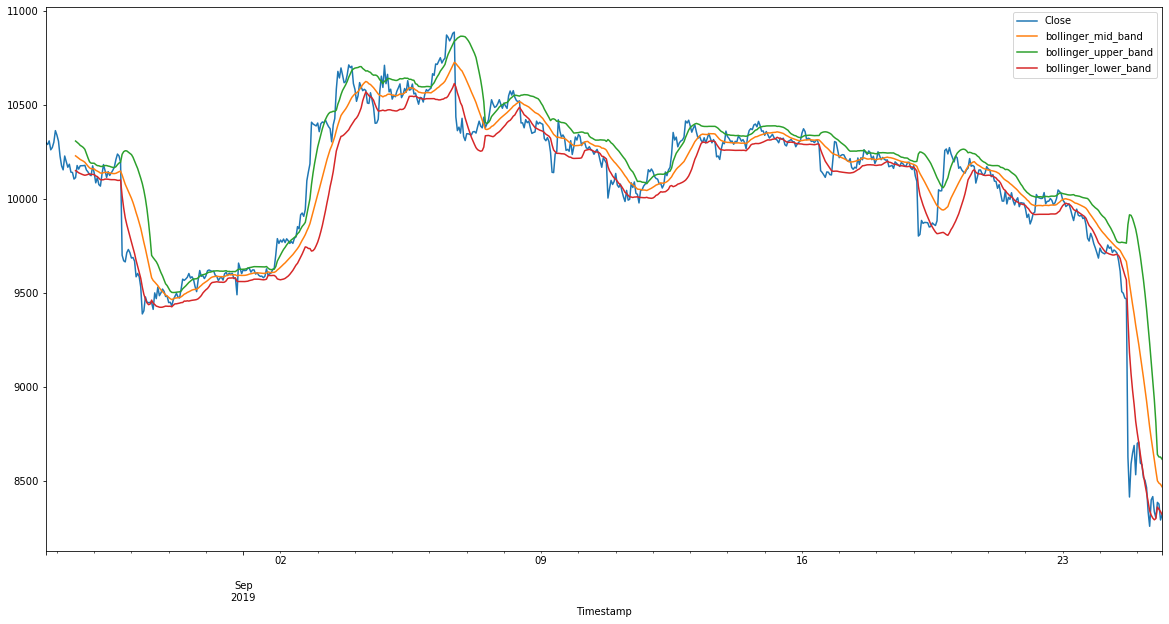

In [10]:
# Plot the Bollinger Bands for BTC/USD closing prices
